In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout

In [4]:
train_dir = './casting_data/casting_data/train'
test_dir = './casting_data/casting_data/test'

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True)


test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [6]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 200, 200, 3)
(32, 2)


In [7]:
# Check class names
class_names = train_data.class_indices
class_names = list(class_names.keys())
print(class_names)

['defect', 'perfect']


In [8]:
def get_sample_image(generator):
    images, labels = next(generator)
    image = images[0]
    label_index = np.argmax(labels[0])
    label_name = class_names[label_index]

    return image, label_name


def sample_images(generator, nrows=3, ncols=3):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
    
    for i in range(nrows*ncols):
        image, label_name = get_sample_image(generator)
        row = i // ncols
        col = i % ncols
        ax = axes[row][col]
        ax.imshow(image)
        ax.set_title(label_name)
        ax.axis('off')

    plt.show()

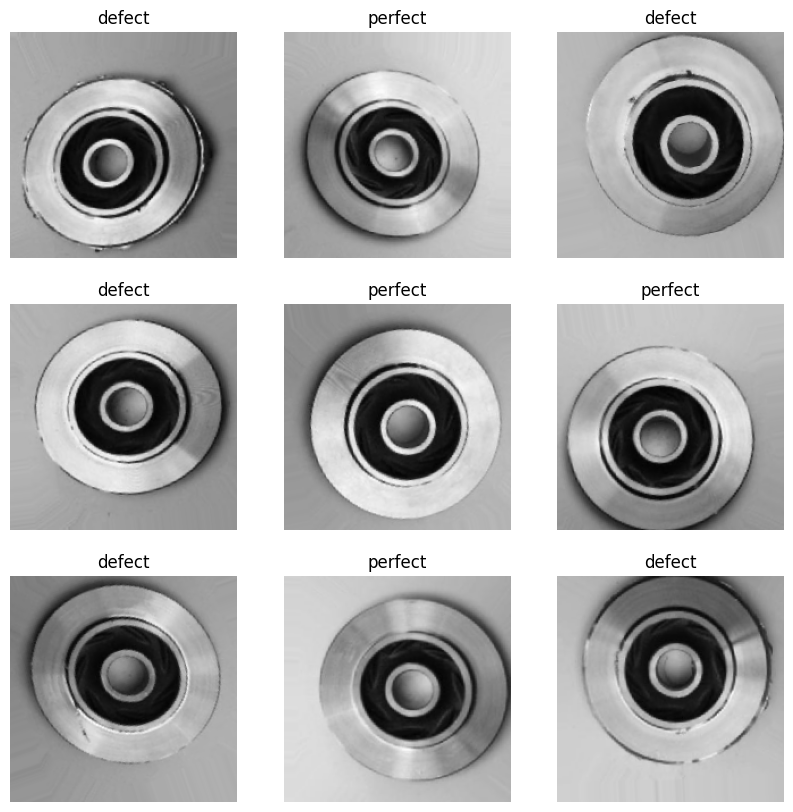

In [9]:
sample_images(train_data, nrows=3, ncols=3)

In [10]:
image_batch

array([[[[0.5178002 , 0.5178002 , 0.5178002 ],
         [0.51859844, 0.51859844, 0.51859844],
         [0.5193967 , 0.5193967 , 0.5193967 ],
         ...,
         [0.6862745 , 0.6862745 , 0.6862745 ],
         [0.69685924, 0.69685924, 0.69685924],
         [0.6945932 , 0.6945932 , 0.6945932 ]],

        [[0.5176471 , 0.5176471 , 0.5176471 ],
         [0.5176471 , 0.5176471 , 0.5176471 ],
         [0.5176471 , 0.5176471 , 0.5176471 ],
         ...,
         [0.6877356 , 0.6877356 , 0.6877356 ],
         [0.69763434, 0.69763434, 0.69763434],
         [0.69411767, 0.69411767, 0.69411767]],

        [[0.5176471 , 0.5176471 , 0.5176471 ],
         [0.5176471 , 0.5176471 , 0.5176471 ],
         [0.5176471 , 0.5176471 , 0.5176471 ],
         ...,
         [0.6901304 , 0.6901304 , 0.6901304 ],
         [0.6968361 , 0.6968361 , 0.6968361 ],
         [0.69411767, 0.69411767, 0.69411767]],

        ...,

        [[0.5893825 , 0.5893825 , 0.5893825 ],
         [0.59607846, 0.59607846, 0.59607846]

In [11]:
# Model layers
model = Sequential([
    Conv2D(32, (2, 2), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(2 ,activation='softmax')
])

C:\Users\opiks\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 199, 199, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 98, 98, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    18,874,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,916,706 (72.16 MB)

 Trainable params: 18,916,706 (72.16 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(train_data,
                    epochs=20,
                    batch_size=32,
                    )

Epoch 1/20


C:\Users\opiks\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


208/208 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/step - accuracy: 0.5866 - loss: 0.8932
Epoch 2/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 349s 2s/step - accuracy: 0.7682 - loss: 0.4747
Epoch 3/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 332s 2s/step - accuracy: 0.8499 - loss: 0.3513
Epoch 4/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step - accuracy: 0.9134 - loss: 0.2261
Epoch 5/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 305s 1s/step - accuracy: 0.9438 - loss: 0.1460
Epoch 6/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 308s 1s/step - accuracy: 0.9388 - loss: 0.1471
Epoch 7/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 305s 1s/step - accuracy: 0.9418 - loss: 0.1363
Epoch 8/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 305s 1s/step - accuracy: 0.9629 - loss: 0.0893
Epoch 9/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 306s 1s/step - accuracy: 0.9650 - loss: 0.0793
Epoch 10/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 305s 1s/step - accuracy: 0.9613 - loss: 0.0875
Epoch 11/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 305s 1s/step - accuracy: 0.9674 - loss: 0.0960
Epoch 12/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 314s 1s/ste

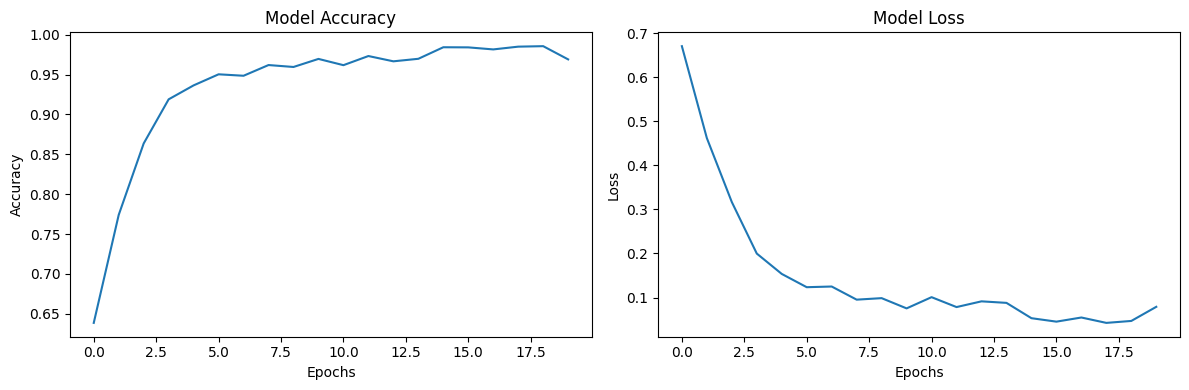

In [15]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot accuracy
    ax[0].plot(history.history['accuracy'])
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_title('Model Accuracy')
    
    # Plot loss
    ax[1].plot(history.history['loss'])
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].set_title('Model Loss')
    
    plt.tight_layout()
    plt.show()

plot_history(history)

In [16]:
result = model.evaluate(test_data)
test_loss, test_accuracy = result

# Mengubah akurasi menjadi persentase
test_accuracy_percentage = test_accuracy * 100

print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy_percentage:.2f}%")


23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 384ms/step - accuracy: 0.8751 - loss: 0.3338
Test loss: 0.2712, Test accuracy: 89.65%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


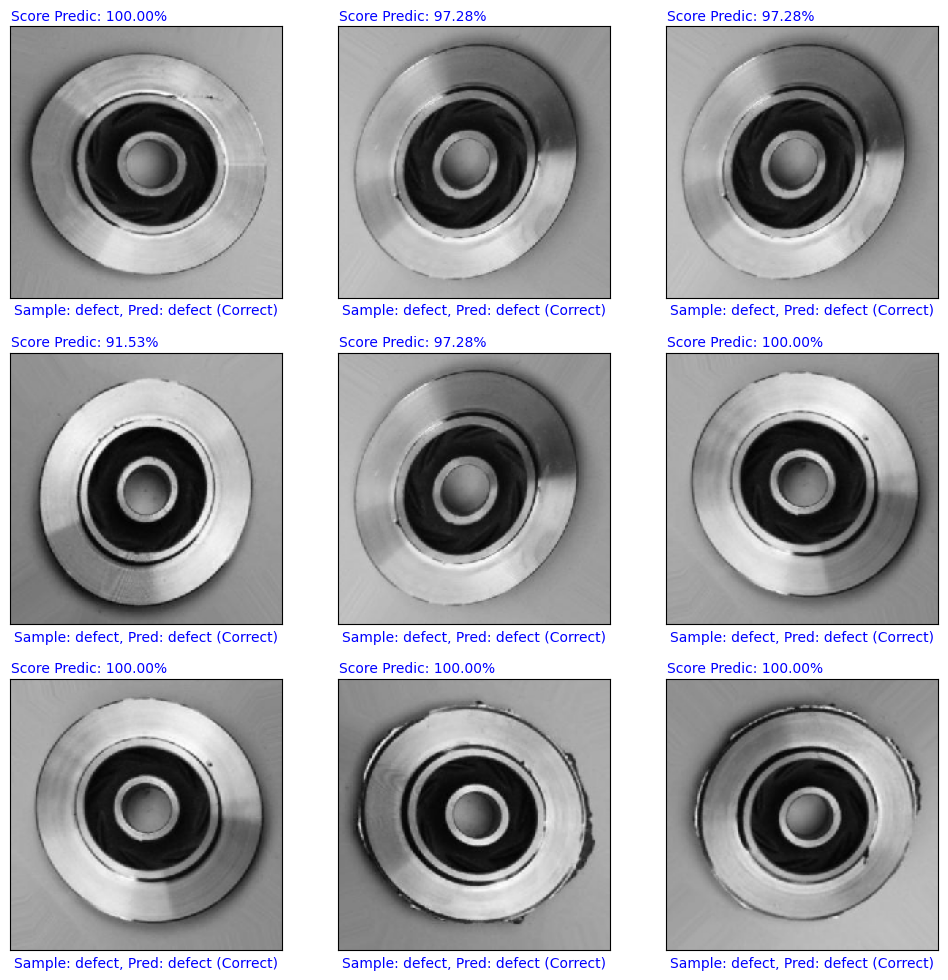

In [17]:
images, labels = next(test_data)    

indices = np.random.choice(range(len(images)), size=9)
images = images[indices]
labels = labels[indices]

predictions = model.predict(images)

class_names = list(test_data.class_indices.keys())

plt.figure(figsize=(12,12))
    
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
        
    image = images[i]
        
    if image.shape[-1] == 1:
        image = np.squeeze(image) 
        
    plt.imshow(image)
        
    predicted_label = np.argmax(predictions[i])
        
    if predicted_label == np.argmax(labels[i]):
        color='blue'
        result_text="Correct"
            
    else:
        color='red'
        result_text="Incorrect"
    
    # Mengubah skor prediksi menjadi persentase
    pred_score_percentage = predictions[i][predicted_label] * 100
    
    # Menambahkan skor prediksi dalam persentase di atas gambar
    plt.text(0, -5, f"Score Predic: {pred_score_percentage:.2f}%", color=color)
    
    label_text = f"Sample: {class_names[np.argmax(labels[i])]}, Pred: {class_names[predicted_label]} ({result_text})"
            
    plt.xlabel(label_text, color=color)


In [18]:
model.save("model.h5")